In [1]:
from WBT.whitebox_tools import WhiteboxTools
import rasterio
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil

wbt = WhiteboxTools()

In [22]:
# Working directory looks like this:
#
#├───surfaces
#│   ├───clear
#│   │       hemicylinder_clear.tif
#│   │       hemisphere_clear.tif
#│   │       paraboloid_clear.tif
#│   │
#│   ├───filtered
#│   │   ├───AdaptiveFilter
#│   │   │       hemicylinder_filtered.tif
#│   │   │       hemisphere_filtered.tif
#│   │   │       paraboloid_filtered.tif
#│   │   │
#│   │   ├───BilateralFilter
#│   │   ├───ConservativeSmoothingFilter
#│   │   ├───EdgePreservingMeanFilter
#│   │   ├───FeaturePreservingSmoothing
#│   │   ├───KNearestMeanFilter
#│   │   ├───LeeSigmaFilter
#│   │   ├───MajorityFilter
#│   │   ├───MeanFilter
#│   │   │       hemicylinder_filtered.tif
#│   │   │       hemisphere_filtered.tif
#│   │   │       paraboloid_filtered.tif
#│   │   │
#│   │   ├───MedianFilter
#│   │   │       hemicylinder_filtered.tif
#│   │   │       hemisphere_filtered.tif
#│   │   │       paraboloid_filtered.tif
#│   │   │
#│   │   └───OlympicFilter
#│   └───noisy
#│           hemicylinder_noisy.tif
#│           hemisphere_noisy.tif
#│           paraboloid_noisy.tif

In [2]:
os.chdir(r'C:\\Users\\sasha\\abstract_surfaces\\')

In [3]:
entries = os.listdir('./surfaces/')
entries

['clear', 'filtered', 'noisy']

In [4]:
clear_dems = os.listdir('./surfaces/' + entries[0])
noisy_dems = os.listdir('./surfaces/' + entries[2])
filtered_dems = os.listdir('./surfaces/' + entries[1])

print(f'Clear dems: {clear_dems}', f'Noisy dems: {noisy_dems}', f'Filtered dems: {filtered_dems}', sep='\n')

Clear dems: ['hemicylinder_clear.tif', 'hemisphere_clear.tif', 'paraboloid_clear.tif']
Noisy dems: ['hemicylinder_noisy.tif', 'hemisphere_noisy.tif', 'paraboloid_noisy.tif']
Filtered dems: []


In [5]:
arr_clear_dems = []
for clear_dem in clear_dems:
    
    tmp_path = r'C:\Users\sasha\abstract_surfaces\surfaces\clear\\' + clear_dem
    #print(tmp_path)
    
    with rasterio.open(tmp_path, 'r') as ds:
        arr_in = ds.read()
    #arr_clear_dems[clear_dem] = arr_in[0]
    arr_clear_dems.append(arr_in[0])
    #plt.imshow(arr_noisy_dems[-1], cmap='binary')
    #plt.show()
    print(f'Appended {clear_dem}')

Appended hemicylinder_clear.tif
Appended hemisphere_clear.tif
Appended paraboloid_clear.tif


In [6]:
arr_noisy_dems = []
for noisy_dem in noisy_dems:
    
    tmp_path = r'C:\Users\sasha\abstract_surfaces\surfaces\noisy\\' + noisy_dem
    #print(tmp_path)
    
    with rasterio.open(tmp_path, 'r') as ds:
        arr_in = ds.read()
    #arr_noisy_dems[noisy_dem] = arr_in[0]
    arr_noisy_dems.append(arr_in[0])
    #plt.imshow(arr_noisy_dems[-1], cmap='binary')
    #plt.show()
    print(f'Appended {noisy_dem}')

Appended hemicylinder_noisy.tif
Appended hemisphere_noisy.tif
Appended paraboloid_noisy.tif


In [19]:
filter_list = (
    r'MeanFilter\\',
    r'MedianFilter\\',
    r'AdaptiveFilter\\'
)

In [20]:
arr_filtered_dems = []
for noisy_dem in noisy_dems:
    
    tmp_path = r'C:\Users\sasha\abstract_surfaces\surfaces\noisy\\' + noisy_dem
    filter_dir = r'C:\Users\sasha\abstract_surfaces\surfaces\filtered\\'
    
    wbt.verbose = True
    
    #MeanFilter
    output_path = filter_dir + filter_list[0] + noisy_dem[:-10] + '_filtered.tif'
    
    wbt.mean_filter(
        i = tmp_path, 
        output = output_path, 
        filterx=5, 
        filtery=5
    )
    
    #MedianFilter
    output_path = filter_dir + filter_list[1] + noisy_dem[:-10] + '_filtered.tif'
    
    wbt.median_filter(
        i = tmp_path, 
        output = output_path, 
        filterx=5, 
        filtery=5,
        sig_digits=2
    )
    
    #AdaptiveFilter
    output_path = filter_dir + filter_list[2] + noisy_dem[:-10] + '_filtered.tif'
    
    wbt.adaptive_filter(
        i = tmp_path, 
        output = output_path, 
        filterx=5, 
        filtery=5, 
        threshold=2.0
    )

.\whitebox_tools.exe --run="MeanFilter" --input='C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemicylinder_noisy.tif' --output='C:\Users\sasha\abstract_surfaces\surfaces\filtered\\MeanFilter\\hemicylinder_filtered.tif' --filterx=5 --filtery=5 -v --compress_rasters=False

****************************
* Welcome to MeanFilter    *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Creating integral images: 0%
Creating integral images: 1%
Creating integral images: 2%
Creating integral images: 3%
Creating integral images: 4%
Creating integral images: 5%
Creating integral images: 6%
Creating integral images: 7%
Creating integral images: 8%
Creating integral images: 10%
Creating integral images: 11%
Creating integral images: 12%
Creating integral images: 13%
Creating integral images: 14%
Creating integral images: 15%
Creating integral images: 16%
Creating integral images: 17%
Creating integral images: 19%
Creating integral images: 20%
Cr

Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.2s
.\whitebox_tools.exe --run="AdaptiveFilter" --input='C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemicylinder_noisy.tif' --output='C:\Users\sasha\abstract_surfaces\surfaces\filtered\\AdaptiveFilter\\hemicylinder_filtered.tif' --filterx=5 --filtery=5 --threshold=2.0 -v --compress_rasters=False

*****************************
* Welcome to AdaptiveFilter *
* Powered by Whiteb

Creating integral images: 80%
Creating integral images: 81%
Creating integral images: 82%
Creating integral images: 83%
Creating integral images: 84%
Creating integral images: 85%
Creating integral images: 86%
Creating integral images: 87%
Creating integral images: 88%
Creating integral images: 89%
Creating integral images: 90%
Creating integral images: 91%
Creating integral images: 92%
Creating integral images: 93%
Creating integral images: 94%
Creating integral images: 95%
Creating integral images: 96%
Creating integral images: 97%
Creating integral images: 98%
Creating integral images: 99%
Creating integral images: 100%
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
P

Calculating integral images: 24%
Calculating integral images: 25%
Calculating integral images: 26%
Calculating integral images: 27%
Calculating integral images: 28%
Calculating integral images: 29%
Calculating integral images: 30%
Calculating integral images: 31%
Calculating integral images: 32%
Calculating integral images: 33%
Calculating integral images: 34%
Calculating integral images: 35%
Calculating integral images: 36%
Calculating integral images: 37%
Calculating integral images: 38%
Calculating integral images: 39%
Calculating integral images: 40%
Calculating integral images: 41%
Calculating integral images: 42%
Calculating integral images: 43%
Calculating integral images: 44%
Calculating integral images: 45%
Calculating integral images: 46%
Calculating integral images: 47%
Calculating integral images: 48%
Calculating integral images: 49%
Calculating integral images: 50%
Calculating integral images: 51%
Calculating integral images: 52%
Calculating integral images: 53%
Calculatin

Progress: 53%
Progress: 54%
Progress: 55%
Progress: 56%
Progress: 57%
Progress: 58%
Progress: 59%
Progress: 60%
Progress: 61%
Progress: 62%
Progress: 63%
Progress: 64%
Progress: 65%
Progress: 66%
Progress: 67%
Progress: 68%
Progress: 69%
Progress: 70%
Progress: 71%
Progress: 72%
Progress: 73%
Progress: 74%
Progress: 75%
Progress: 76%
Progress: 77%
Progress: 78%
Progress: 79%
Progress: 80%
Progress: 81%
Progress: 82%
Progress: 83%
Progress: 84%
Progress: 85%
Progress: 86%
Progress: 87%
Progress: 88%
Progress: 89%
Progress: 90%
Progress: 91%
Progress: 92%
Progress: 93%
Progress: 94%
Progress: 95%
Progress: 96%
Progress: 97%
Progress: 98%
Progress: 99%
Progress: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.2s
.\whitebox_tools.exe --run="MedianFilter" --input='C:\Users\sasha\abstract_surfaces\surfaces\noisy\\paraboloid_noisy.tif' --output='C:\Users\sasha\abstract_surfaces\surfaces\filtered\\MedianFilter\\paraboloid_filtered.tif' --filterx=5 --filtery=5 --sig_digi

Calculating integral images: 66%
Calculating integral images: 67%
Calculating integral images: 68%
Calculating integral images: 69%
Calculating integral images: 70%
Calculating integral images: 71%
Calculating integral images: 72%
Calculating integral images: 73%
Calculating integral images: 74%
Calculating integral images: 75%
Calculating integral images: 76%
Calculating integral images: 77%
Calculating integral images: 78%
Calculating integral images: 79%
Calculating integral images: 80%
Calculating integral images: 81%
Calculating integral images: 82%
Calculating integral images: 83%
Calculating integral images: 84%
Calculating integral images: 85%
Calculating integral images: 86%
Calculating integral images: 87%
Calculating integral images: 88%
Calculating integral images: 89%
Calculating integral images: 90%
Calculating integral images: 91%
Calculating integral images: 92%
Calculating integral images: 93%
Calculating integral images: 94%
Calculating integral images: 95%
Calculatin

In [23]:
#**Analysing results**

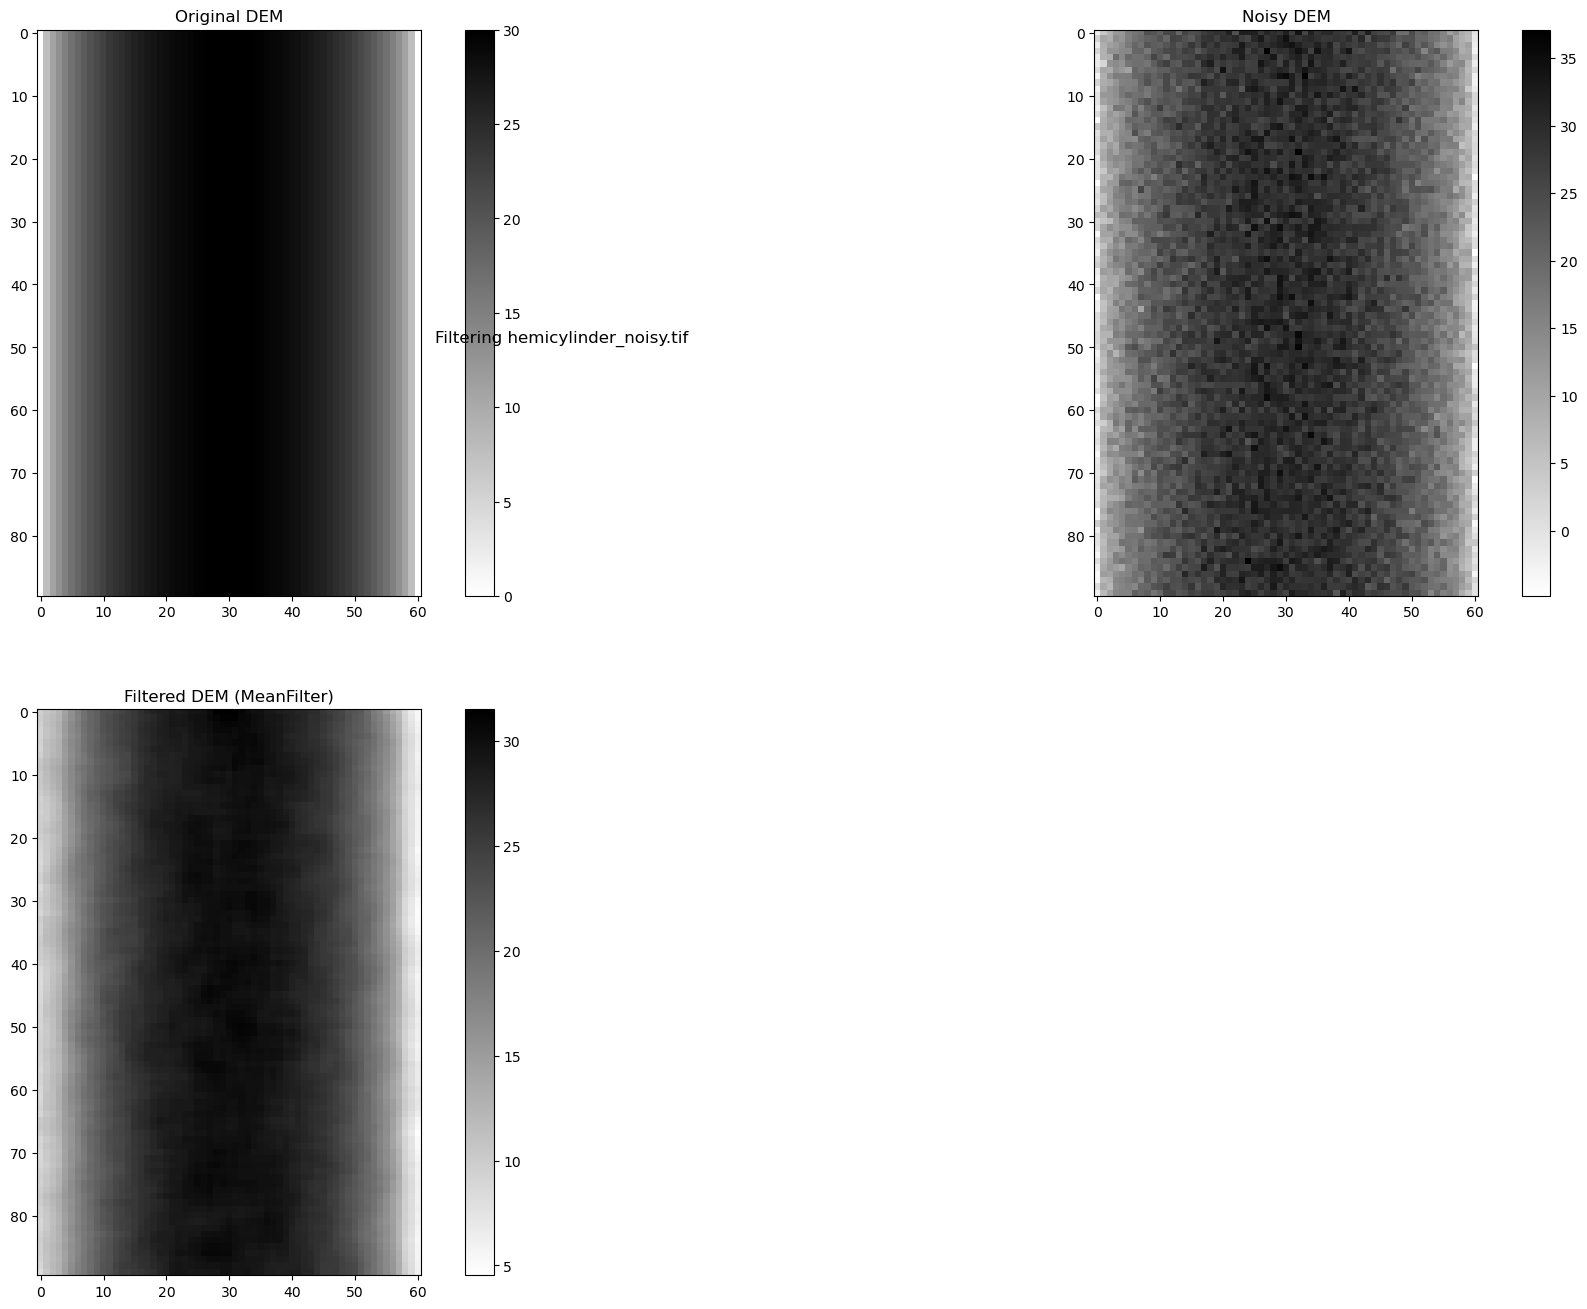

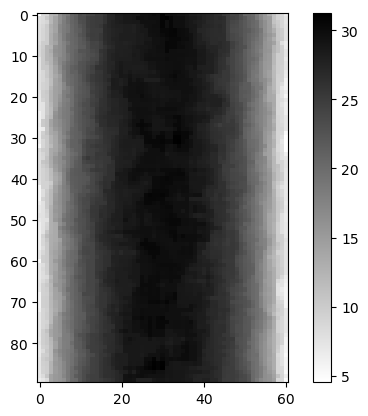

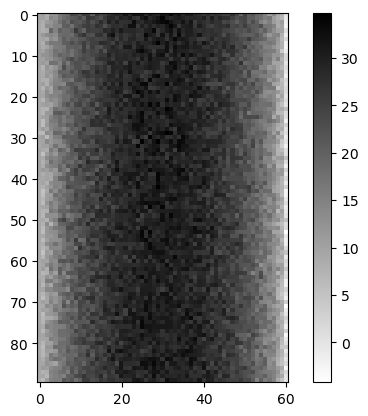

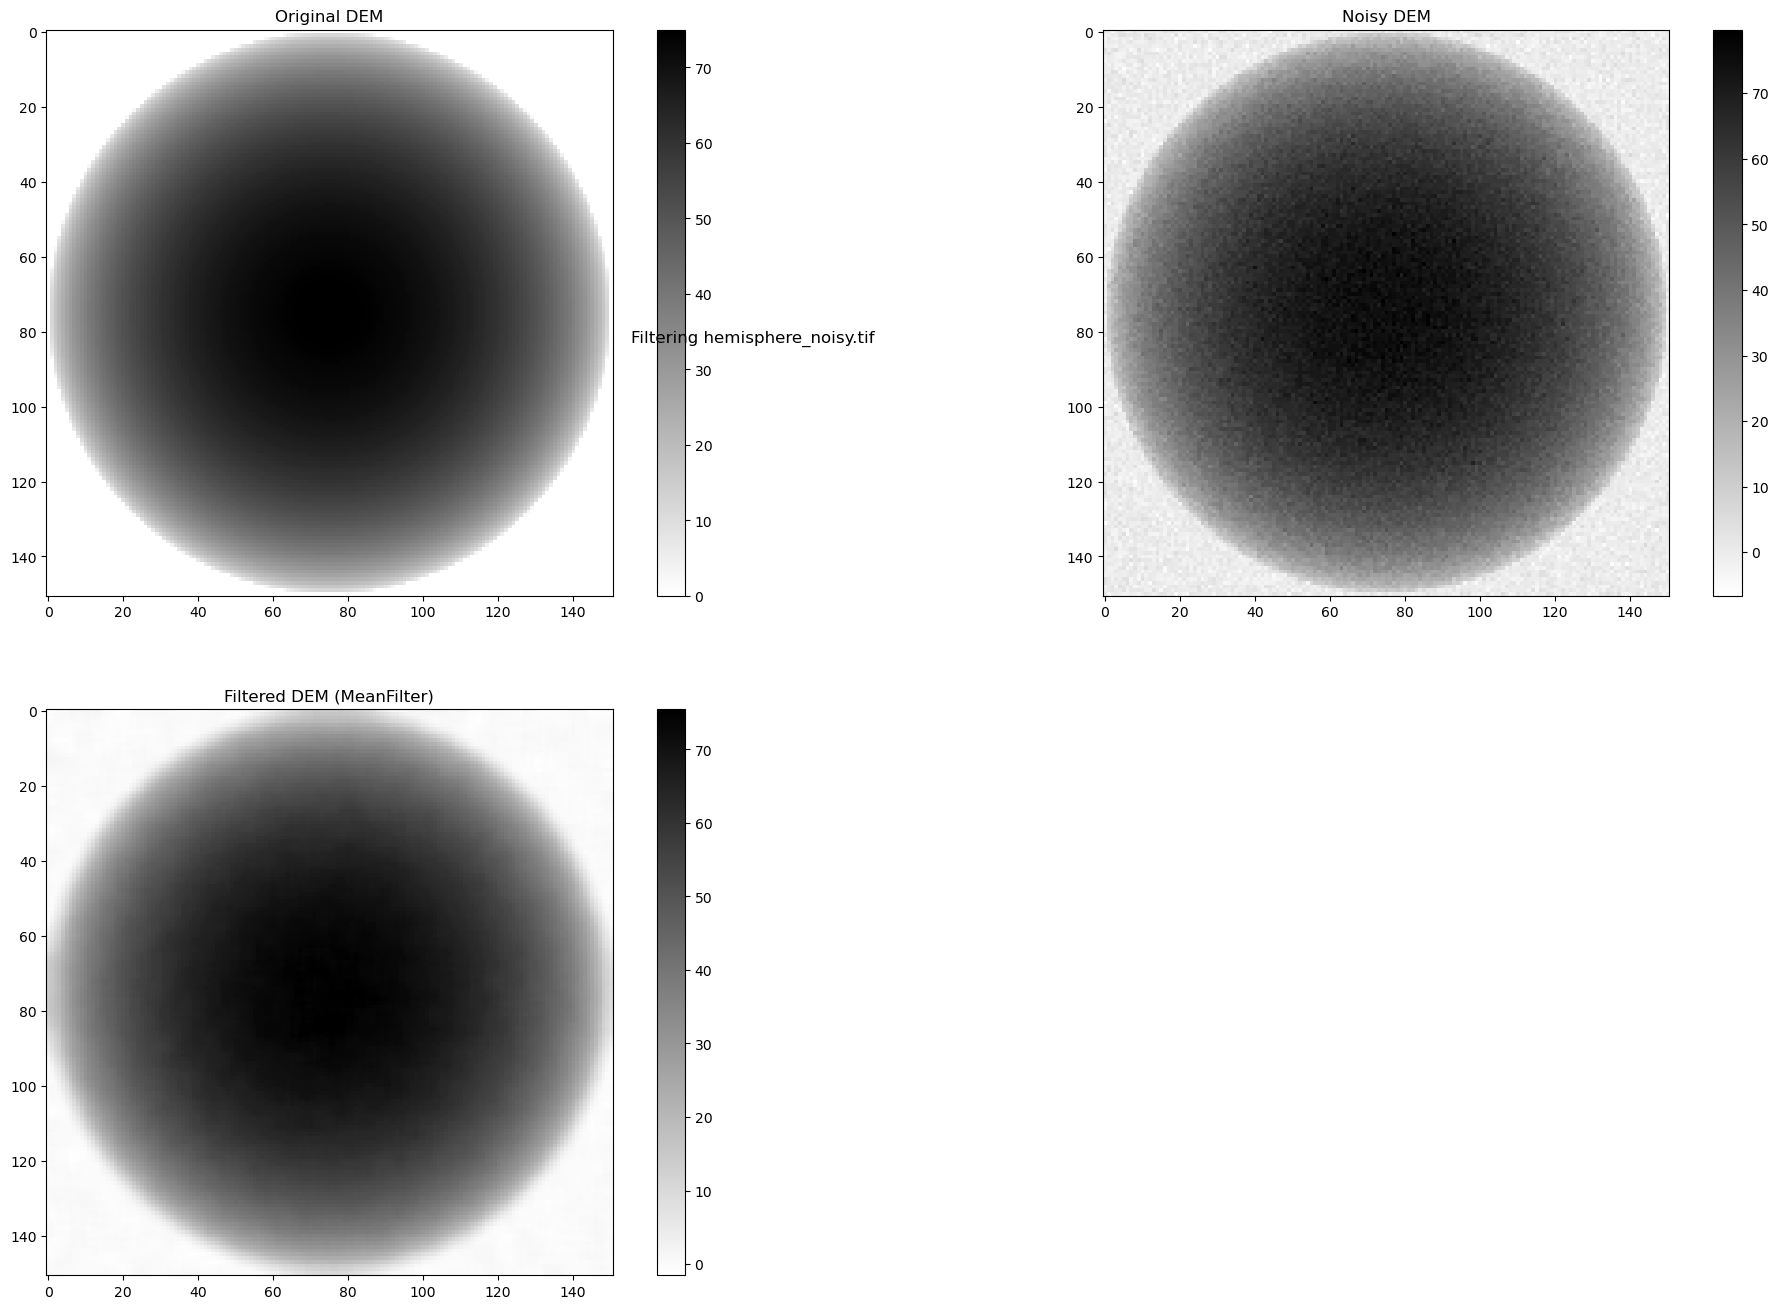

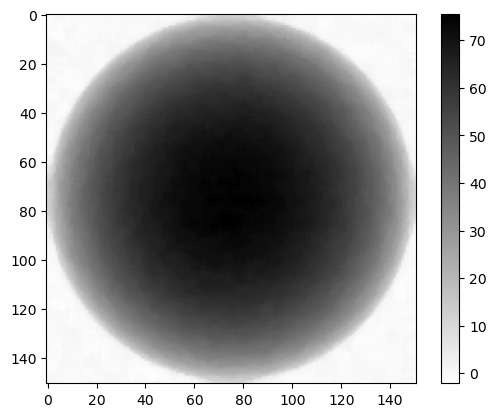

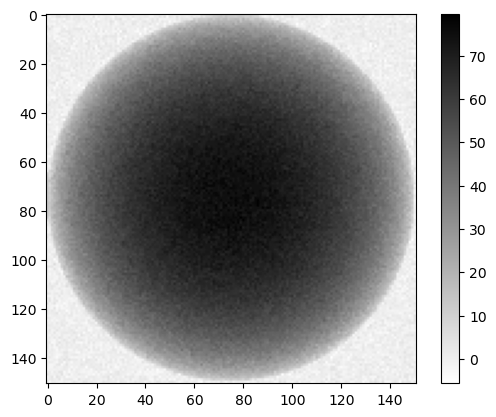

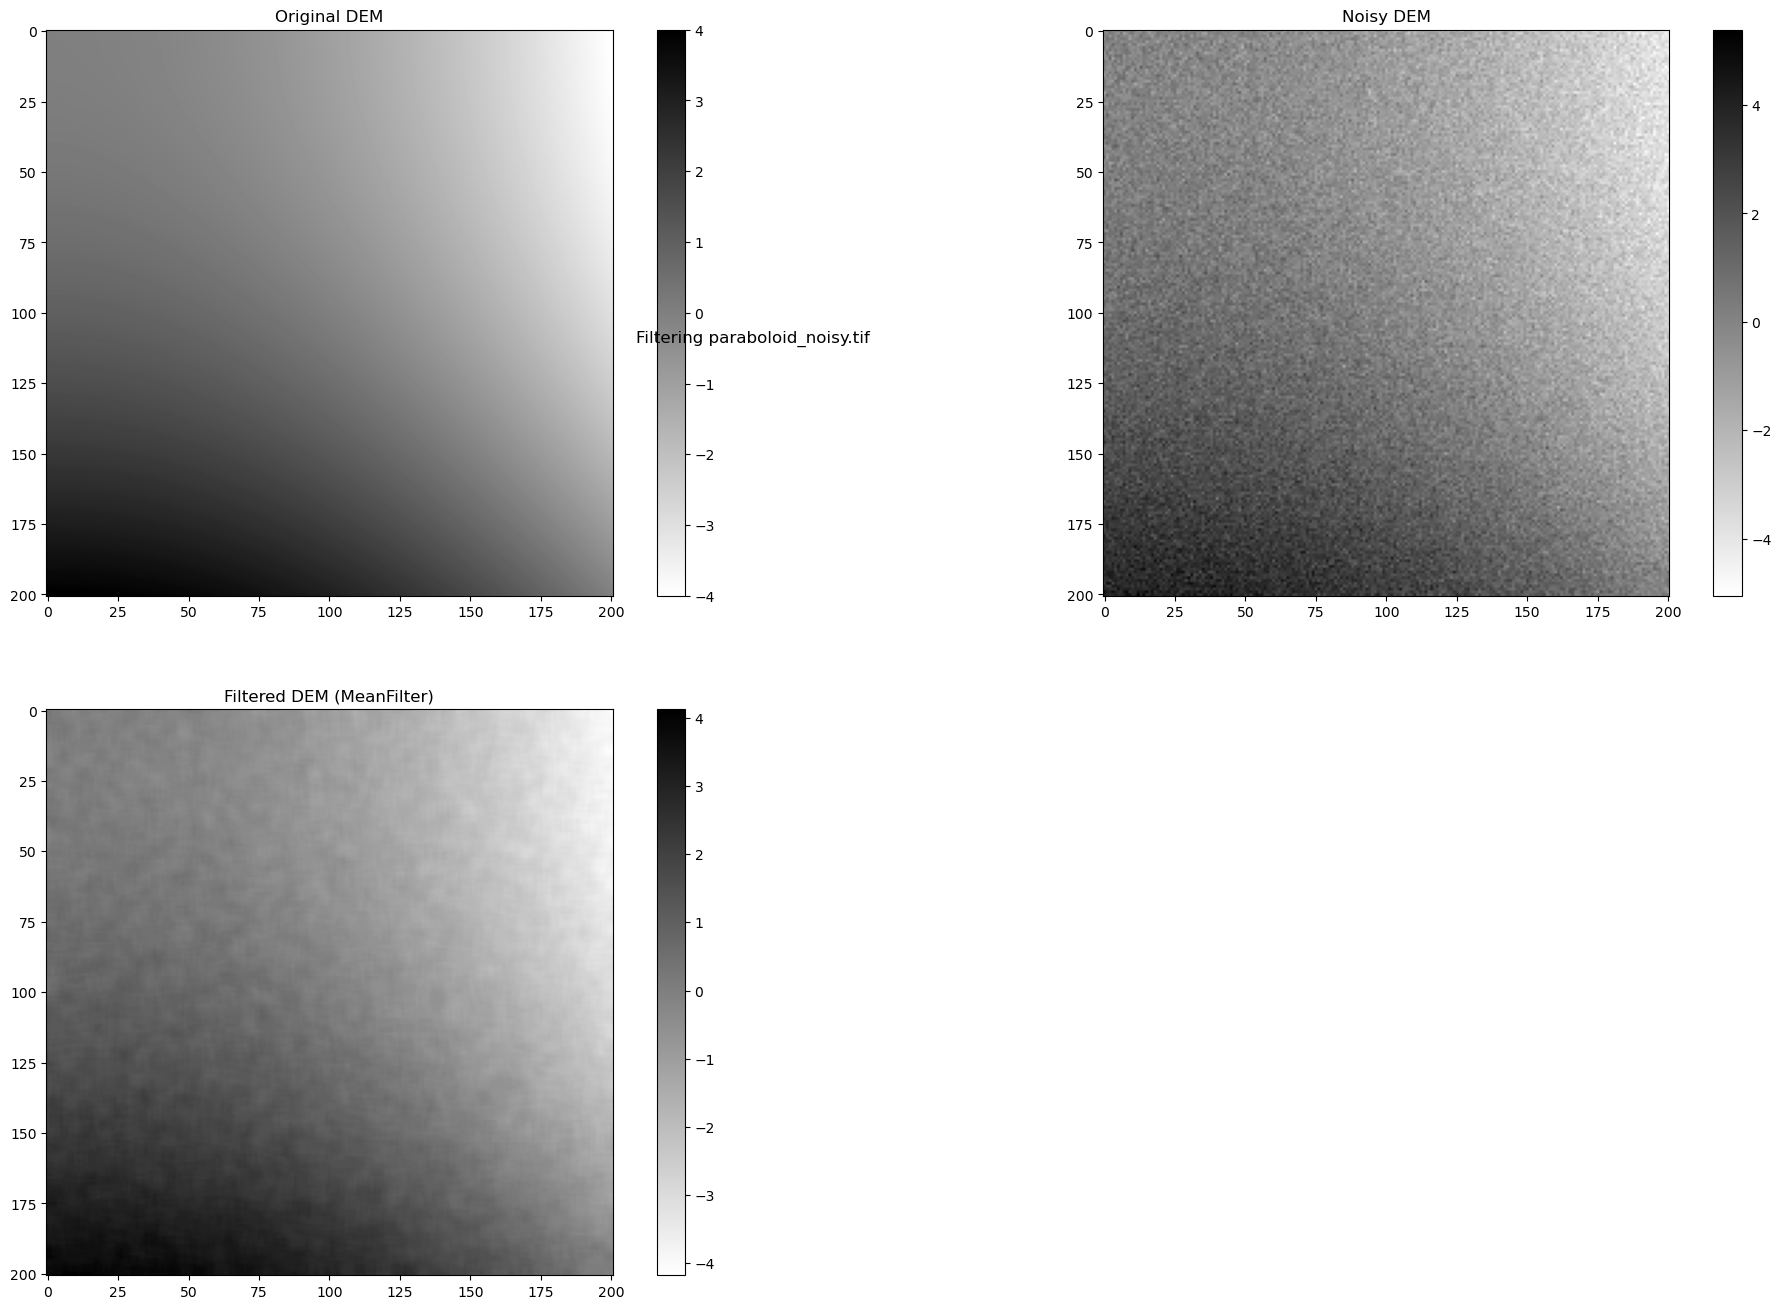

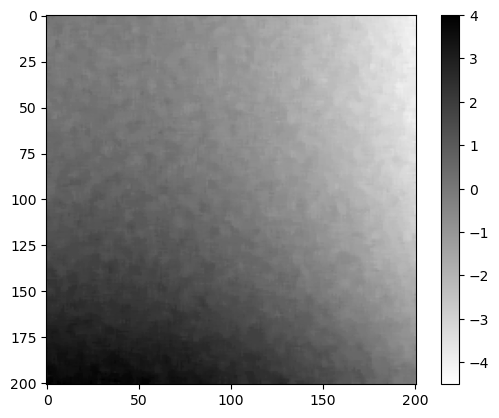

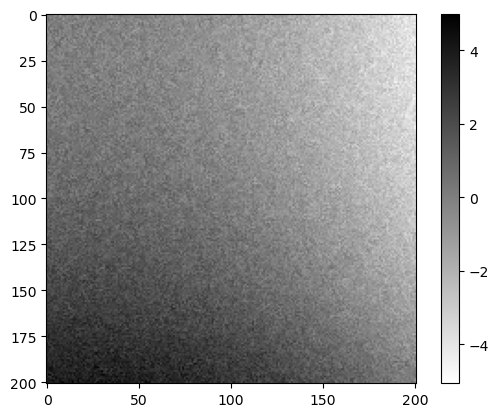

In [46]:
for noisy_dem in noisy_dems:
    
    filter_dir = r'C:\Users\sasha\abstract_surfaces\surfaces\filtered\\'
               
    fig = plt.figure(figsize=(25, 25))
    
    fig.suptitle(f'Filtering {noisy_dem}', y=0.76)
    
    rast_path = r'C:\Users\sasha\abstract_surfaces\surfaces\clear\\' + noisy_dem[:-10] + '_clear.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_clear = ds.read()
    
    ax1 = fig.add_subplot(3, 2, 1)
    ax1.set_title('Original DEM')
    plt.imshow(data_clear[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    rast_path = r'C:\Users\sasha\abstract_surfaces\surfaces\noisy\\' + noisy_dem
    with rasterio.open(rast_path, 'r') as ds:
        data_noisy = ds.read()

    ax2 = fig.add_subplot(3, 2, 2)
    ax2.set_title('Noisy DEM')
    plt.imshow(data_noisy[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    #MeanFilter
    rast_path = filter_dir + filter_list[0] + noisy_dem[:-10] + '_filtered.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_filt = ds.read()
        
    ax3 = fig.add_subplot(3, 2, 3)
    ax3.set_title('Filtered DEM (MeanFilter)')
    plt.imshow(data_filt[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    plt.show()
    
    #MedianFilter
    rast_path = filter_dir + filter_list[1] + noisy_dem[:-10] + '_filtered.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_filt = ds.read()
        
    ax4 = fig.add_subplot(3, 2, 4)
    ax4.set_title('Filtered DEM (MedianFilter)')
    plt.imshow(data_filt[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    plt.show()
    
    #AdaptiveFilter
    rast_path = filter_dir + filter_list[2] + noisy_dem[:-10] + '_filtered.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_filt = ds.read()
        
    ax5 = fig.add_subplot(3, 2, 5)
    ax5.set_title('Filtered DEM (AdaptiveFilter)')
    plt.imshow(data_filt[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    plt.show()